In [327]:
from __future__ import division, print_function

import numpy as np
import pandas as pd

from IPython.core.display import Image, HTML

import random

import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [407]:
PATH = './assets/images/'

In [218]:
np.random.seed(0)

n_samples = 30
degrees = [1, 2, 4, 16]

# set the true function
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# set the X and y points incorporating noise
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Regularization & Overfitting

# We talked about minimizing the sum of square errors

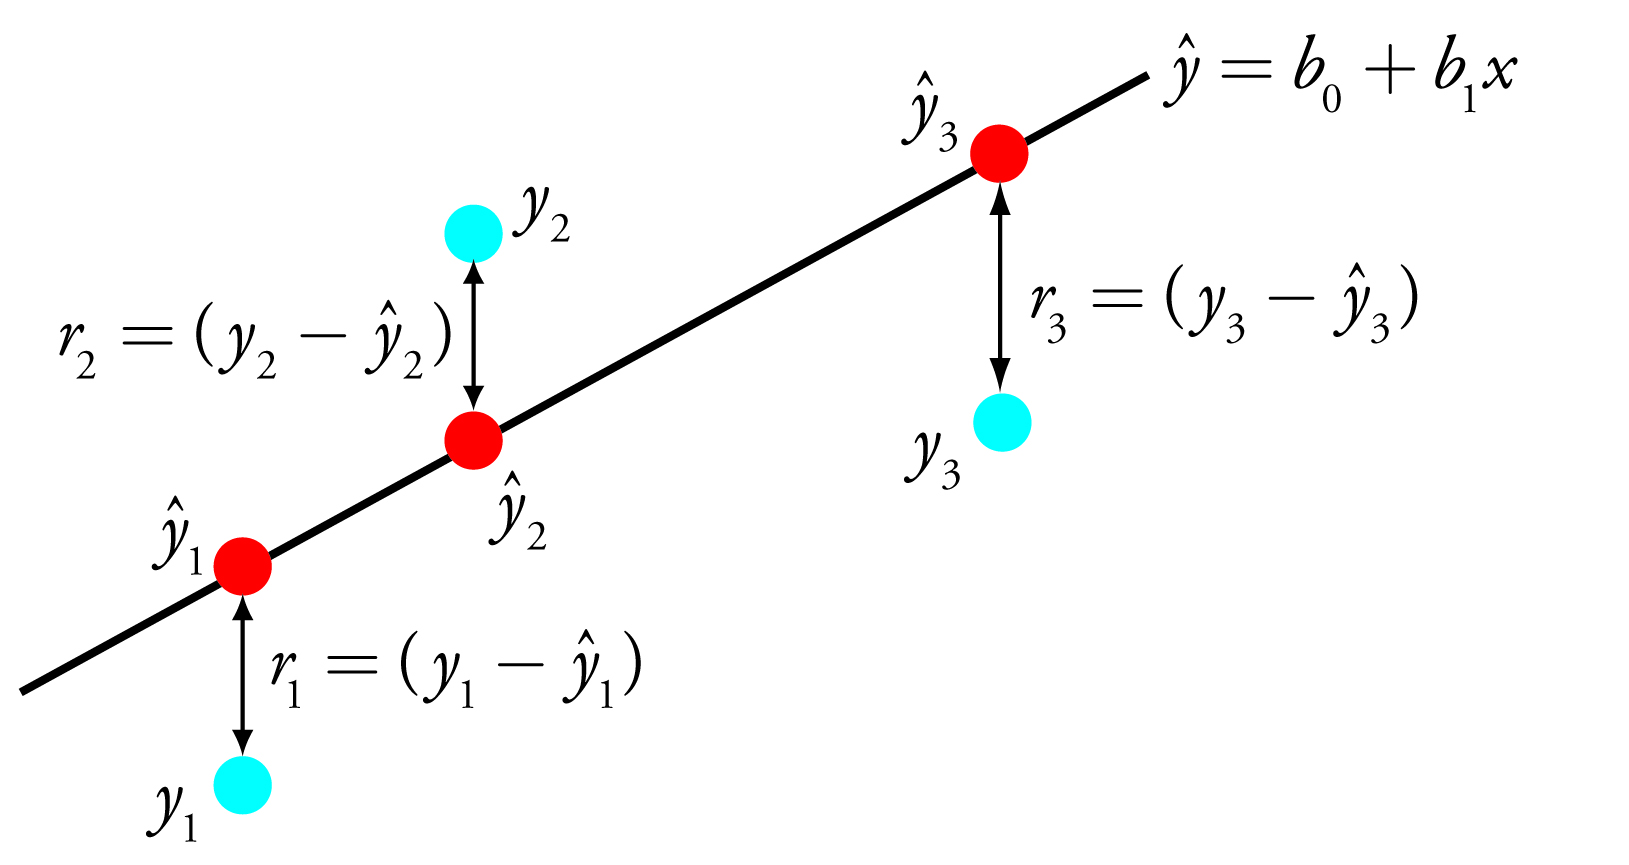

In [308]:
Image(PATH + 'min_res.jpg')

## Mathematical Formulation for sum of squared residuals

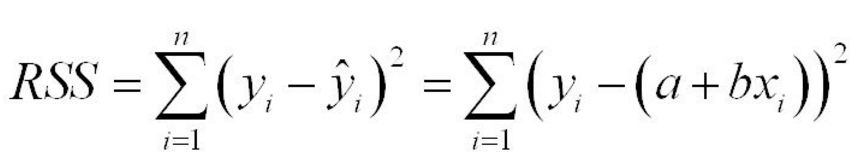

In [310]:
Image(PATH + 'rss.png')

# Overfitting and Underfitting

## Increasing features from 1 to 16 degree polynomial

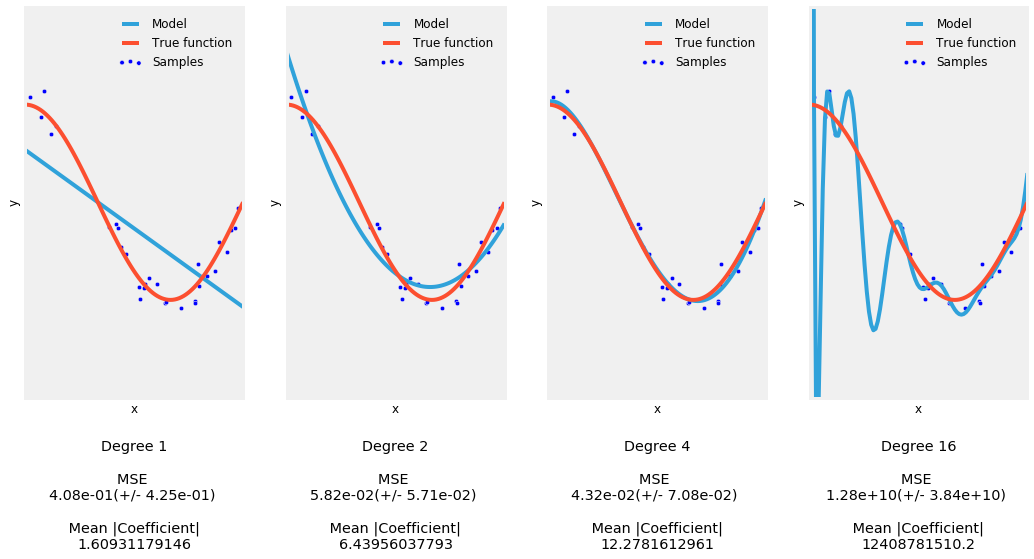

In [265]:
# set the plot size
plt.subplots(figsize=(16,7))

# create a plot for each polynomial degree plotted
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    sum_abs = sum(abs(linear_regression.coef_))/(len(linear_regression.coef_))
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e}) \n\n Mean |Coefficient| \n{:}"
    .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

# Let's talk about penalties...

## Ridge Regression (L2) vs. Lasso (L1)

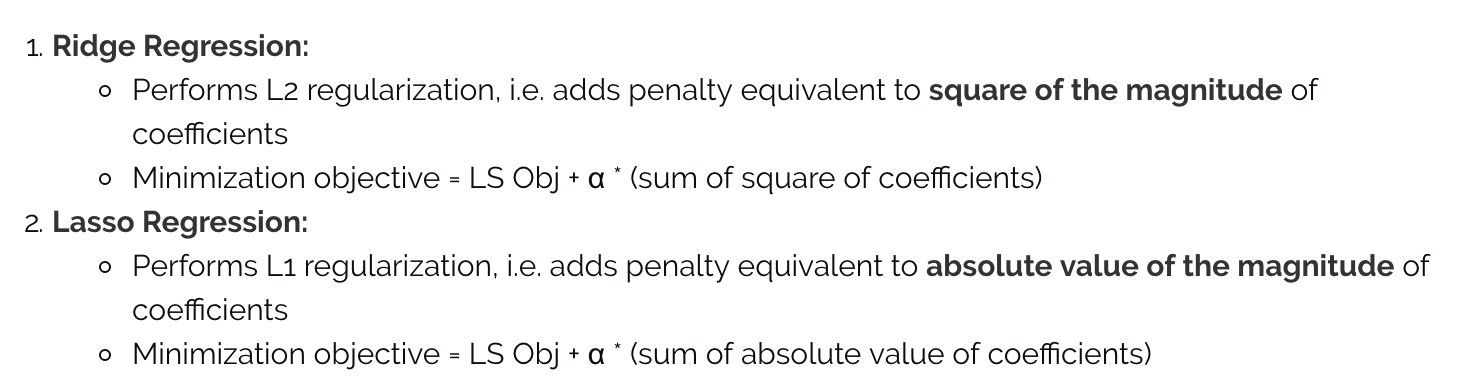

In [261]:
Image(PATH + 'lasso_and_ridge.png')

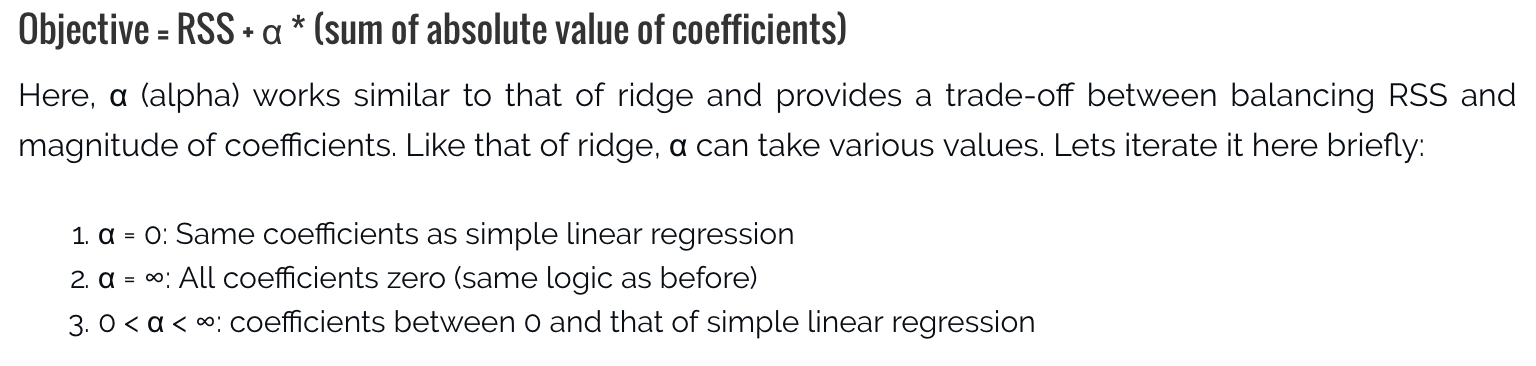

In [262]:
Image(PATH + 'lasso.png')

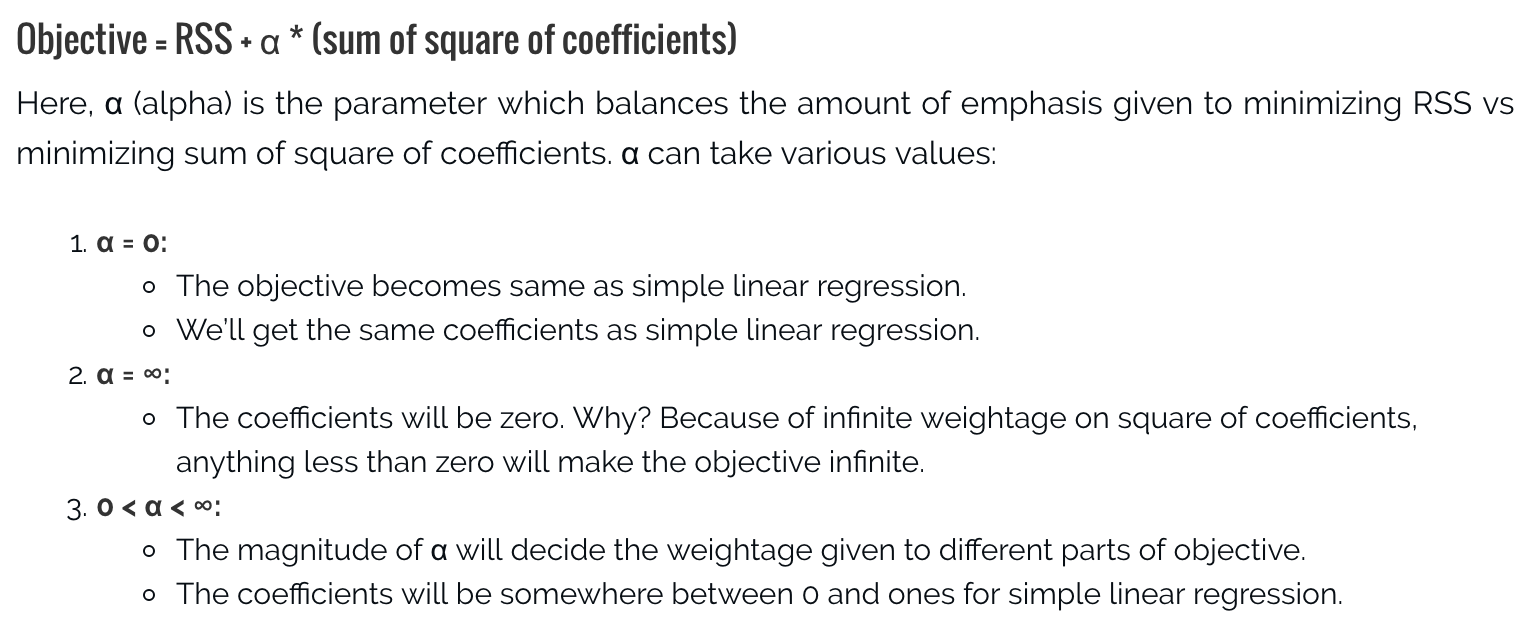

In [263]:
Image(PATH + 'ridge.png')

## Iso-surfaces

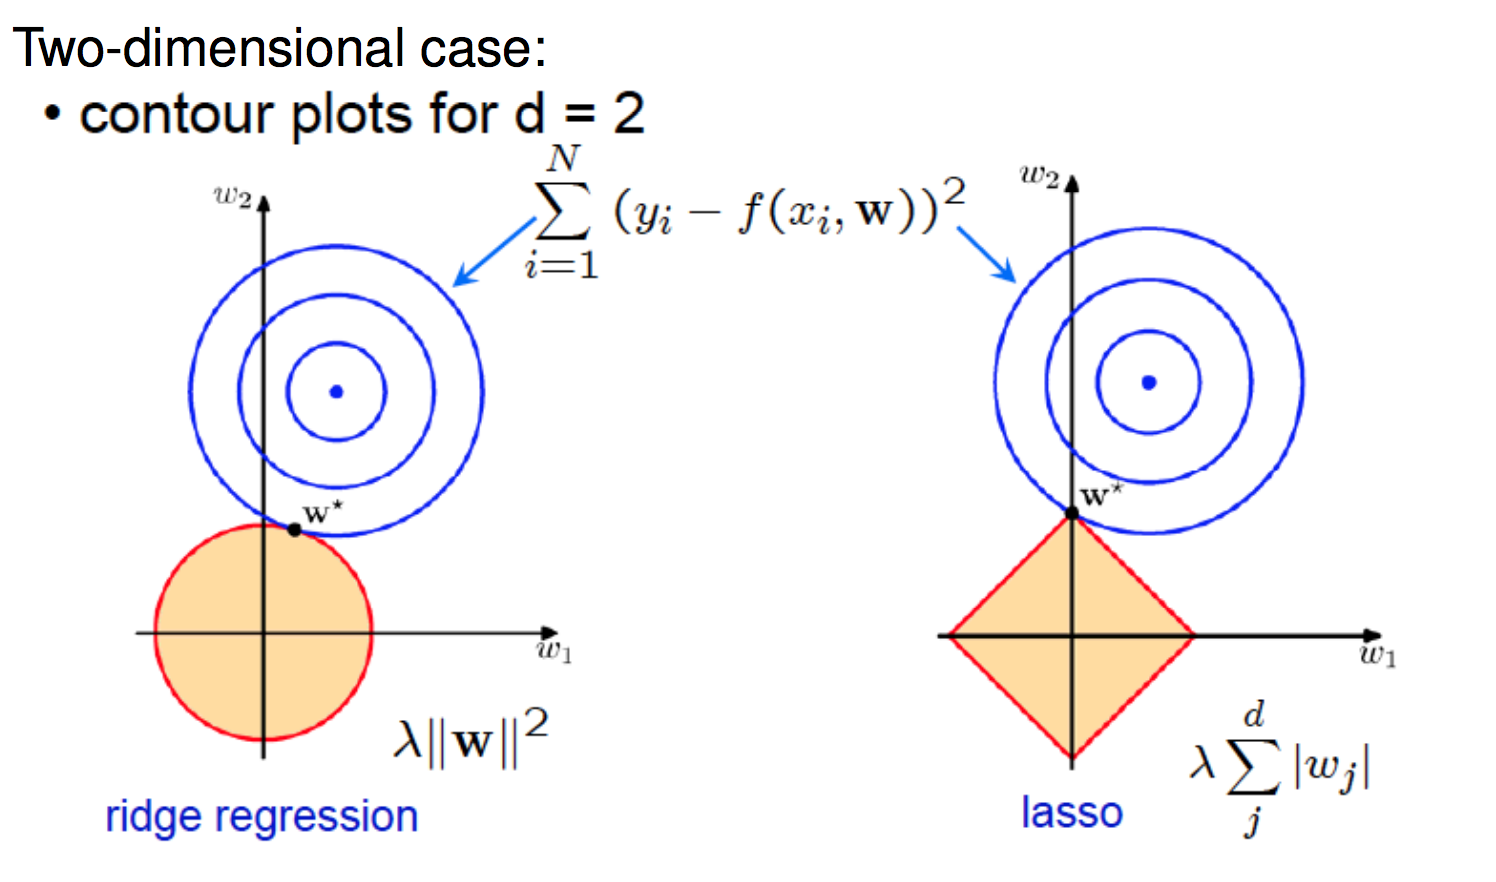

In [260]:
Image(PATH + 'l1_vs_l2.png')

# Let's look at Lasso Regression (L1)

## Lasso (L1): alpha = ~0

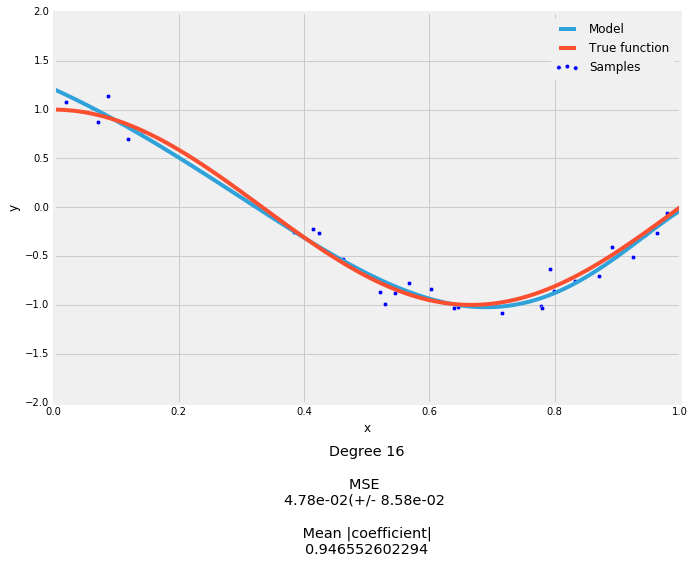

In [300]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
lasso_regression = Lasso(alpha=0.00000000000000000001)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", lasso_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(lasso_regression.coef_))/(len(lasso_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Lasso (L1): alpha = .1

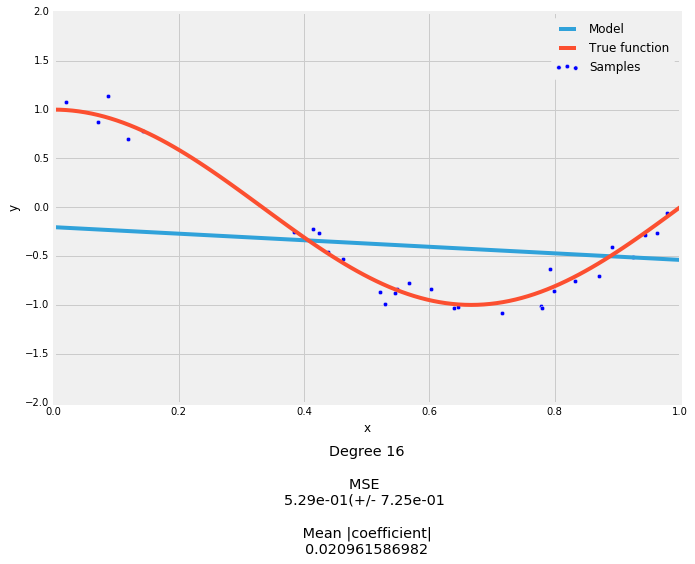

In [298]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
lasso_regression = Lasso(alpha=.1)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", lasso_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(lasso_regression.coef_))/(len(lasso_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Lasso (L1): alpha = 1

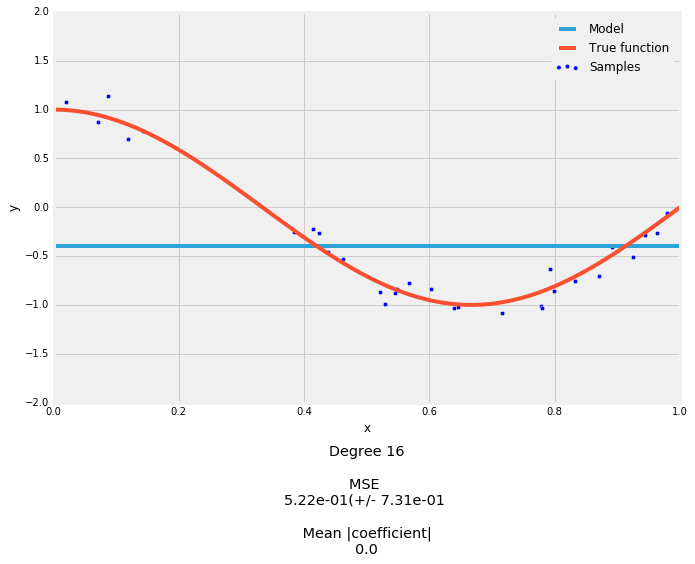

In [297]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
lasso_regression = Lasso(alpha=1)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", lasso_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(lasso_regression.coef_))/(len(lasso_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## At alpha = 1, Lasso has dropped the mean coefficient to 0 
## We essentialy have the mean of the y values now

## Now, let's take a look at Ridge Regression (L2)

## Ridge Regression - L2 - alpha equals 0

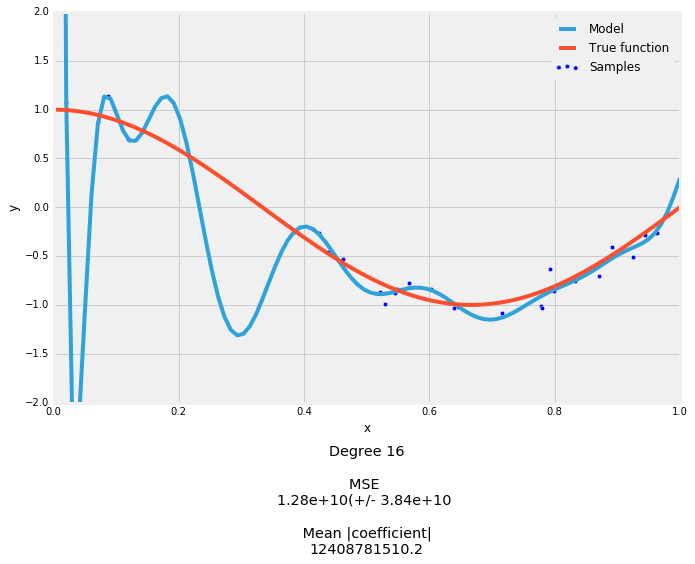

In [267]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
ridge_regression = Ridge(alpha=0)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(ridge_regression.coef_))/(len(ridge_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Ridge Regression (L2): alpha = 1

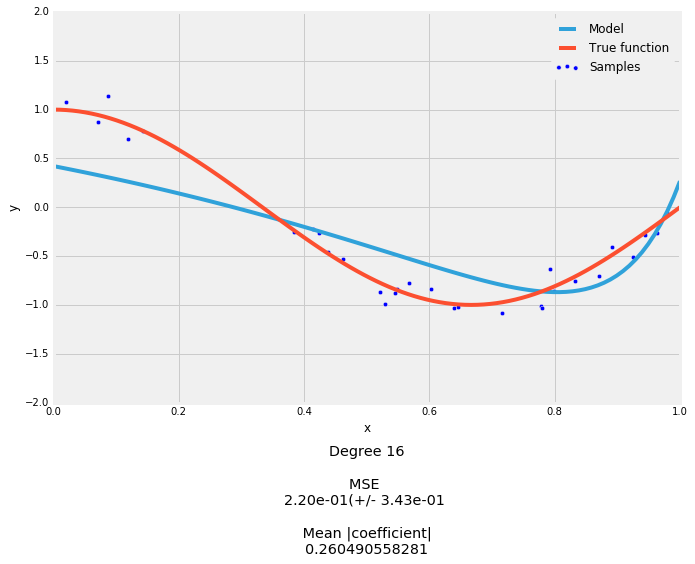

In [304]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
ridge_regression = Ridge(alpha=1)

polynomial_features = PolynomialFeatures(degree=16, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(ridge_regression.coef_))/(len(ridge_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

## Ridge Regression (L2): alpha = 10

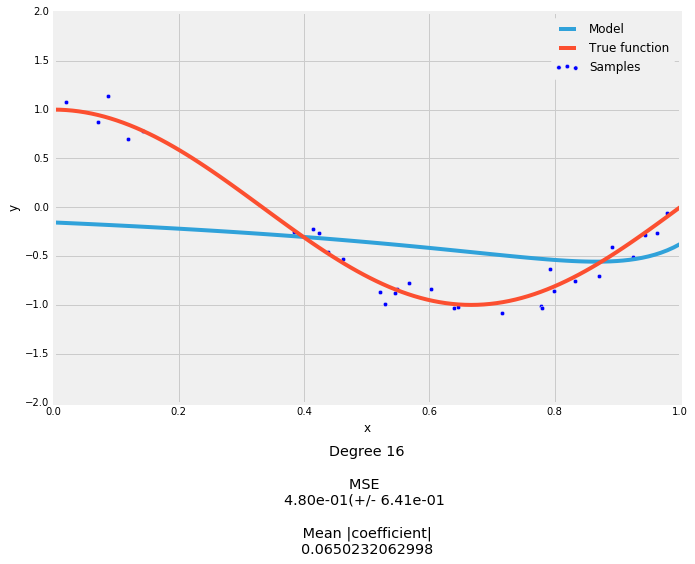

In [303]:
# set the plot size
plt.subplots(figsize=(10,7))
plt.setp(ax, xticks=(), yticks=())

# fit model
ridge_regression = Ridge(alpha=10)

polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
sum_abs = sum(abs(ridge_regression.coef_))/(len(ridge_regression.coef_))

X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, label="Samples")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\n\nMSE \n{:.2e}(+/- {:.2e} \n\n Mean |coefficient| \n{:}"
          .format(degrees[i], -scores.mean(), scores.std(), sum_abs), y=-.4)

### <ul> Even at alpha = 10, the mean coefficient is not 0

## How can we know what the proper alpha is?

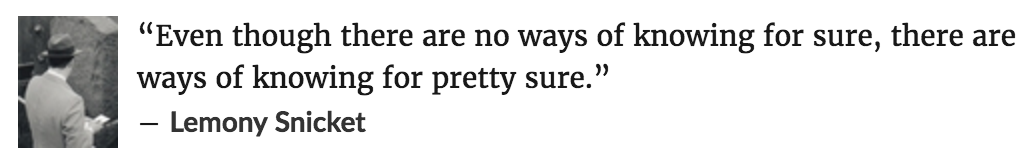

In [313]:
Image(PATH + 'knowing.png')

# Cross-validation

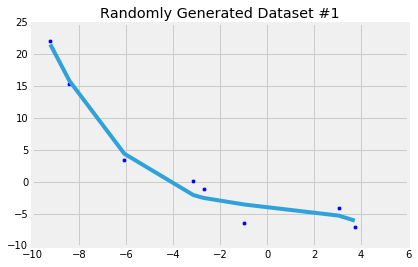

Train R-squared: 0.975198418661


CV-selected alpha: 10.0


Test R-squared: 0.66604523959


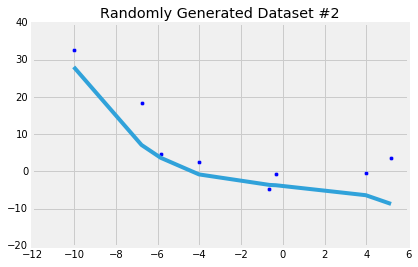

In [404]:
# Generate some data
def generate_data():
    xs = np.arange(-4, 4, 1)
    data = [(2 * x - 3 * random.random(), (x - 5*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

rlmcv = linear_model.RidgeCV()
xs, ys = generate_data()
xs2, ys2 = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

# Trained model
plt.scatter(xs, ys)
plt.title("Randomly Generated Dataset #1")
plt.plot(xs, predictions)
plt.show()
print("Train R-squared:", ridge_model.score(X, ys))
print("\n\nCV-selected alpha:", rlmcv.alpha_)

# Test model
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)

print('\n\nTest R-squared:', ridge_model.score(X, ys2))

# What if we had no penalty?

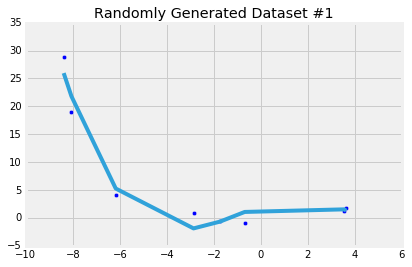

Train R-squared: 0.963586469992


CV-selected alpha: 0


Test R-squared: -10.1483682402


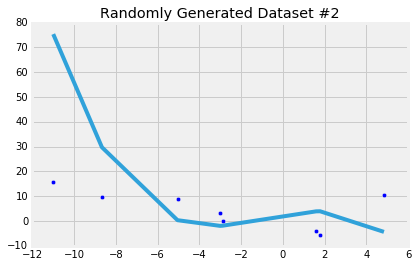

In [401]:
# Generate some data
def generate_data():
    xs = np.arange(-4, 4, 1)
    data = [(2 * x - 3 * random.random(), (x - 5*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

rm = linear_model.Ridge(alpha=0)
xs, ys = generate_data()
xs2, ys2 = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rm.fit(X, y)
predictions = ridge_model.predict(X)

# Trained model
plt.scatter(xs, ys)
plt.title("Randomly Generated Dataset #1")
plt.plot(xs, predictions)
plt.show()
print("Train R-squared:", ridge_model.score(X, ys))
print("\n\nCV-selected alpha:", rm.alpha)

# Test model
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)

print('\n\nTest R-squared:', ridge_model.score(X, ys2))

# Independent Practice

Now let's explore the Boston housing data and apply cross-validation. There is an [excellent example](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html) on the scikit-learn website. Take the code available there and modify it to compare the non-cross-validated fit and the cross-validated fit. You'll need to use [this function](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html) for the cross-validated score.

Work through the cross-validation example, adding in r^2 calculations.
Does cross-validation produce a better fit in this case? Why or why not?

Once you feel comfortable with it, modify the model to use just the variables RM and LSTAT and repeat

Lasso (least absolute shrinkage and selection operator) is another method of applying regularization. By this point you should be able to modify the examples above to apply the Lasso model from scikit-learn and the cross-validated version LassoCV. The main difference between Lasso and Ridge regularization is how the penalty works. Read through the example and explain how the loss functions are different.